In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import gzip
#np.random.seed(42)

In [2]:
#Function to Load images from the file
def load_images(filename):
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    return data.reshape(-1, 28 * 28)

In [3]:
#Function to load labels from the file
def load_labels(filename):
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    return data

In [4]:
#Function to get images and labels from the corresponding files
def load_data():
    train_images = load_images('train-images-idx3-ubyte.gz')
    train_labels = load_labels('train-labels-idx1-ubyte.gz')
    test_images = load_images('t10k-images-idx3-ubyte.gz')
    test_labels = load_labels('t10k-labels-idx1-ubyte.gz')
    return train_images, train_labels, test_images, test_labels

In [5]:
#Function to generate random weights of a matrix of size (10,784)
def get_weights():
    return np.random.rand(10,784)

In [6]:
#Function to generate a numpy array for a desired output
def desired_output(train_label):
    output = np.zeros(10)
    output[train_label] = 1
    return output

In [7]:
#Fuction to implement step function
def step_function(input_list):
    output_list = []
    for input in input_list:
        if input >= 0:
            output_list.append(1)
        else:
            output_list.append(0)
    return np.array(output_list)

In [8]:
#Function to implement the classification algorithm which is a part of PTA
def classify(n,W,train_images,train_labels):
    mis_classifications = 0
    for i in range(n):
        v = np.matmul(W,train_images[i])
        j = np.argmax(v)
        if j != train_labels[i]:
            mis_classifications+= 1
    print('mis_classifications:',mis_classifications)
    return mis_classifications

In [9]:
#Function to update weights in the PTA
def update_weights(W,eta,train_labels,train_images):
    for i in range(n):
        #term1 = step_function(np.matmul(W,train_images[i]))
        #print(term1.shape)
        #term2 = desired_output(train_labels[i]) - term1
        #print(term2.shape)
        #term3 = np.dot(eta,term2)
        #print(term3.shape)
        W = W + np.matmul(np.dot(eta,desired_output(train_labels[i])-step_function(np.matmul(W,train_images[i]))).reshape(-1,1),train_images[i].reshape(-1,1).transpose())
    return W

In [10]:
# PTA function to classify the MNSIT dataset
def pta(train_images,train_labels,n,eta,threshold,W):
    epoch = 0
    errors = []
    epochs = []
    while True:
        print('epoch:',epoch)
        mis_classifications = classify(n,W,train_images,train_labels)
        errors.append(mis_classifications)
        epochs.append(epoch)
        epoch+= 1
        W = update_weights(W,eta,train_labels,train_images)
        print('Threshold:',errors[epoch - 1]/n)
        print('-' * 50)
        if (errors[epoch - 1])/n <= threshold or epoch > 100:
            break
    return W,errors,epochs

In [11]:
#Function to plot the misclassification vs number of epochs
def misclassifications_plot(mis_classify,epochs,samples,eta,threshold):
    fig,ax = plt.subplots(figsize=(8,8))
    plt.plot(epochs,mis_classify,marker = '*')
    plt.title('Plot of Number of Misclassifications Vs Number of epochs with Learning Rate:{} and Samples: {} and Threshold {} '.format(eta,samples,threshold))
    plt.xlabel('Number of epochs')
    plt.ylabel('Number of Mis classifications')
    plt.show()
    return

In [12]:
#Function to calculate the percentage of test misclassifications
def get_test_mis_classification(test_mis_classifications,test_images):
    per_test_mis_classification = (test_mis_classifications/len(test_images)) * 100
    print('Percentage of misclassified test samples: {}'.format(per_test_mis_classification))
    return

In [13]:
#Getting data from the files
train_images, train_labels, test_images, test_labels = load_data()

#### f. Run Steps (d) and (e) for n = 50, η = 1, and some very small ϵ (ϵ = 0 should also work). You should observe that step (d) terminates with 0 errors eventually. So, we have 0% error according to our training samples. Plot the epoch number vs. the number of misclassification errors (including epoch 0). Now, run Step (e) and record the percentage of misclassified test samples (over all 10000 test samples). Explain the discrepancy (if they are different why? if they are the same why?) between the percentages of errors obtained through the training and test samples.

epoch: 0
mis_classifications: 46
Threshold: 0.92
--------------------------------------------------
epoch: 1
mis_classifications: 17
Threshold: 0.34
--------------------------------------------------
epoch: 2
mis_classifications: 4
Threshold: 0.08
--------------------------------------------------
epoch: 3
mis_classifications: 4
Threshold: 0.08
--------------------------------------------------
epoch: 4
mis_classifications: 0
Threshold: 0.0
--------------------------------------------------


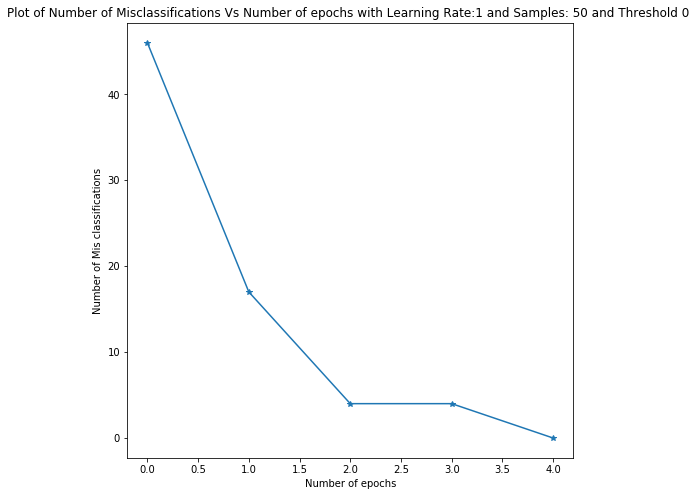

Test Data:
mis_classifications: 4558
Percentage of misclassified test samples: 45.58


In [14]:
n = 50
eta = 1
threshold = 0

W,errors,epochs = pta(train_images,train_labels,n,eta,threshold,get_weights())
_ = misclassifications_plot(errors,epochs,n,eta,threshold)

print('Test Data:')
test_mis_classifications = classify(len(test_images),W,test_images,test_labels)
get_test_mis_classification(test_mis_classifications,test_images)

2f: The number of training examples used are very less (50 out of 60,000). The intial misclassification (epoch-0) with the training samples are very high close to (92%) as we chose random weights initially. After updating the weights based on the learning rate, input, output and the desired output the rate of misclassifications kept reducing at each epoch(weight updation).<br/>
After training over 50 samples, when tested on the 10,000 set of testing data, the percentage misclassifications recorded was ~ 45%(45.58).<br/>
Since only a few training samples were used for training the network, the weight updated could not classify all the observations correctly.<br/>
We need to see if by changing different parameters (learning rate, number of training samples), can we obtain reduced misclassifications.

#### g. Run Steps (d) and (e) for n = 1000, η = 1, and some very small ϵ (ϵ = 0 should also work). Again, you should observe that step (d) terminates with 0 errors eventually. Repeat the same tasks as in Step (f). Compare what you obtain here with what you have obtained in Step (f).

epoch: 0
mis_classifications: 833
Threshold: 0.833
--------------------------------------------------
epoch: 1
mis_classifications: 226
Threshold: 0.226
--------------------------------------------------
epoch: 2
mis_classifications: 187
Threshold: 0.187
--------------------------------------------------
epoch: 3
mis_classifications: 97
Threshold: 0.097
--------------------------------------------------
epoch: 4
mis_classifications: 74
Threshold: 0.074
--------------------------------------------------
epoch: 5
mis_classifications: 75
Threshold: 0.075
--------------------------------------------------
epoch: 6
mis_classifications: 77
Threshold: 0.077
--------------------------------------------------
epoch: 7
mis_classifications: 95
Threshold: 0.095
--------------------------------------------------
epoch: 8
mis_classifications: 33
Threshold: 0.033
--------------------------------------------------
epoch: 9
mis_classifications: 52
Threshold: 0.052
--------------------------------------

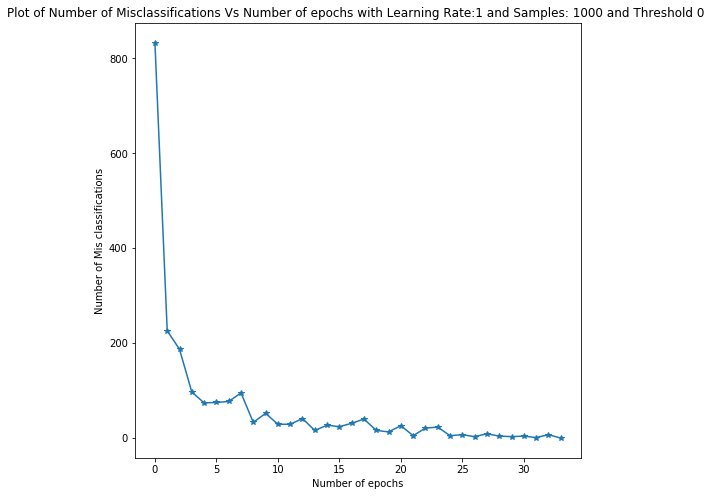

Test Data:
mis_classifications: 1894
Percentage of misclassified test samples: 18.94


In [15]:
n = 1000
eta = 1
threshold = 0

W,errors,epochs = pta(train_images,train_labels,n,eta,threshold,get_weights())
_ = misclassifications_plot(errors,epochs,n,eta,threshold)

print('Test Data:')
test_mis_classifications = classify(len(test_images),W,test_images,test_labels)
get_test_mis_classification(test_mis_classifications,test_images)

2g. By increasing the number of training samples, the network has taken a larger number of epochs to converge, indicating fine tuning of the weights to classify the samples more correctly. In the intial epoch the rate of misclassification was very high ~ 83% and it gradually reduced as the weights were updated.<br/>
The percentage misclassification for the same test data with 10000 samples now is ~ 19% (18.94) which is better compared to the earlier version i.e with just 50 samples that was approximarty 58%. <br/>
We can say that by increasing the number of training samples, the network weights were tuned very well by observing more data and it classified much better for unseen data as well.

#### h. Run Step (d) for n = 60000 and ϵ = 0. Make note of (i.e., plot) the errors as the number of epochs grow large, and note that the algorithm may not converge. Comment on the results

epoch: 0
mis_classifications: 49602
Threshold: 0.8267
--------------------------------------------------
epoch: 1
mis_classifications: 9688
Threshold: 0.16146666666666668
--------------------------------------------------
epoch: 2
mis_classifications: 9252
Threshold: 0.1542
--------------------------------------------------
epoch: 3
mis_classifications: 10517
Threshold: 0.17528333333333335
--------------------------------------------------
epoch: 4
mis_classifications: 9807
Threshold: 0.16345
--------------------------------------------------
epoch: 5
mis_classifications: 9310
Threshold: 0.15516666666666667
--------------------------------------------------
epoch: 6
mis_classifications: 9640
Threshold: 0.16066666666666668
--------------------------------------------------
epoch: 7
mis_classifications: 9799
Threshold: 0.16331666666666667
--------------------------------------------------
epoch: 8
mis_classifications: 9230
Threshold: 0.15383333333333332
----------------------------------

Threshold: 0.14995
--------------------------------------------------
epoch: 73
mis_classifications: 10695
Threshold: 0.17825
--------------------------------------------------
epoch: 74
mis_classifications: 8372
Threshold: 0.13953333333333334
--------------------------------------------------
epoch: 75
mis_classifications: 9718
Threshold: 0.16196666666666668
--------------------------------------------------
epoch: 76
mis_classifications: 8749
Threshold: 0.14581666666666668
--------------------------------------------------
epoch: 77
mis_classifications: 8621
Threshold: 0.14368333333333333
--------------------------------------------------
epoch: 78
mis_classifications: 8093
Threshold: 0.13488333333333333
--------------------------------------------------
epoch: 79
mis_classifications: 9362
Threshold: 0.15603333333333333
--------------------------------------------------
epoch: 80
mis_classifications: 8759
Threshold: 0.14598333333333333
------------------------------------------------

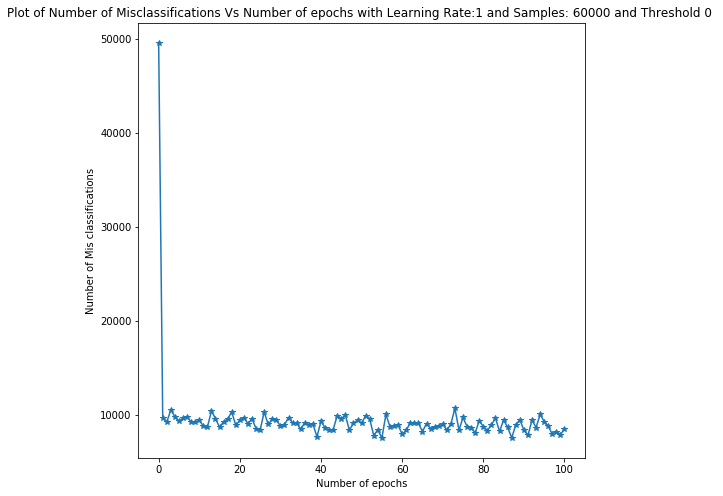

Test Data:
mis_classifications: 1317
Percentage of misclassified test samples: 13.170000000000002


In [16]:
n = 60000
eta = 1
threshold = 0

W,errors,epochs = pta(train_images,train_labels,n,eta,threshold,get_weights())
_ = misclassifications_plot(errors,epochs,n,eta,threshold)

print('Test Data:')
test_mis_classifications = classify(len(test_images),W,test_images,test_labels)
get_test_mis_classification(test_mis_classifications,test_images)

2h. For this case, intially i ran the pta algorithm for the entire 60,000 samples and found out that the algorithm was not converging to 0 even after 300 epochs. So i limited the number of epochs to 100 and the weights were updated until that epoch.<br/>
Initially the percentage of misclassification was very high, and gradually at the end of 100th epoch the percentage reduced to 14%. The weights recorded at that instance was taken to classify the test data.<br/>
With the test data, the percentage of misclassification was close to 13%. The result obtained was more similar to the one with 1000 training samples

#### i. Using your observations in the previous step, pick some appropriate value for ϵ (such that your algorithm in (d) will eventually terminate). Repeat the following two subitems three times with different initial weights and comment on the results:
• Run Step (d) for n = 60000, some η of your choice and the ϵ you picked.<br/>
• Run Step (e) to with the W you obtained in the previous step



**************************************************

Iteration - 1

epoch: 0
mis_classifications: 53151
Threshold: 0.88585
--------------------------------------------------
epoch: 1
mis_classifications: 10025
Threshold: 0.16708333333333333
--------------------------------------------------
epoch: 2
mis_classifications: 8617
Threshold: 0.14361666666666667
--------------------------------------------------
epoch: 3
mis_classifications: 9892
Threshold: 0.16486666666666666
--------------------------------------------------
epoch: 4
mis_classifications: 9541
Threshold: 0.15901666666666667
--------------------------------------------------
epoch: 5
mis_classifications: 8709
Threshold: 0.14515
--------------------------------------------------
epoch: 6
mis_classifications: 8748
Threshold: 0.1458
--------------------------------------------------
epoch: 7
mis_classifications: 11035
Threshold: 0.18391666666666667
--------------------------------------------------
epoch: 8
mis_classifications:

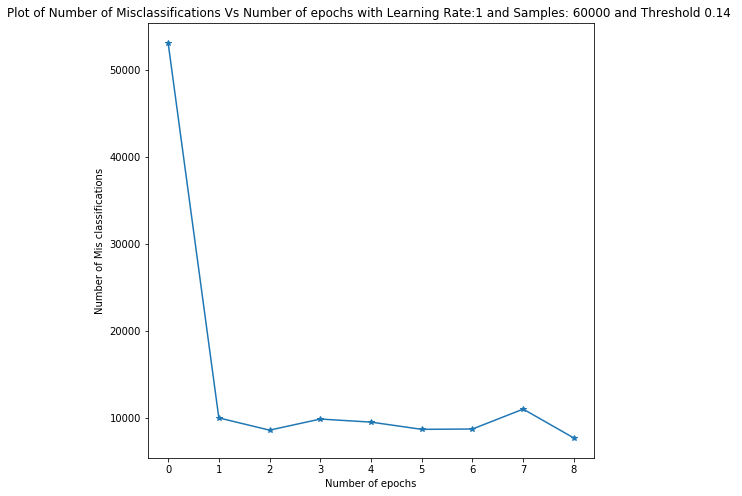

Iteration - 1
Test Data:
mis_classifications: 1589
Percentage of misclassified test samples: 15.89


**************************************************

Iteration - 2

epoch: 0
mis_classifications: 53888
Threshold: 0.8981333333333333
--------------------------------------------------
epoch: 1
mis_classifications: 10735
Threshold: 0.17891666666666667
--------------------------------------------------
epoch: 2
mis_classifications: 10164
Threshold: 0.1694
--------------------------------------------------
epoch: 3
mis_classifications: 10361
Threshold: 0.17268333333333333
--------------------------------------------------
epoch: 4
mis_classifications: 11308
Threshold: 0.18846666666666667
--------------------------------------------------
epoch: 5
mis_classifications: 10350
Threshold: 0.1725
--------------------------------------------------
epoch: 6
mis_classifications: 9519
Threshold: 0.15865
--------------------------------------------------
epoch: 7
mis_classifications: 11119
Threshold:

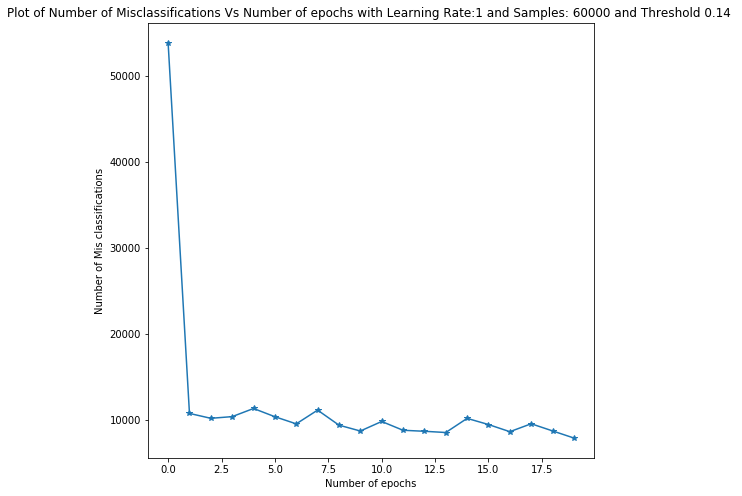

Iteration - 2
Test Data:
mis_classifications: 1524
Percentage of misclassified test samples: 15.24


**************************************************

Iteration - 3

epoch: 0
mis_classifications: 52491
Threshold: 0.87485
--------------------------------------------------
epoch: 1
mis_classifications: 10761
Threshold: 0.17935
--------------------------------------------------
epoch: 2
mis_classifications: 9485
Threshold: 0.15808333333333333
--------------------------------------------------
epoch: 3
mis_classifications: 9469
Threshold: 0.15781666666666666
--------------------------------------------------
epoch: 4
mis_classifications: 10171
Threshold: 0.16951666666666668
--------------------------------------------------
epoch: 5
mis_classifications: 10021
Threshold: 0.16701666666666667
--------------------------------------------------
epoch: 6
mis_classifications: 9428
Threshold: 0.15713333333333335
--------------------------------------------------
epoch: 7
mis_classifications: 109

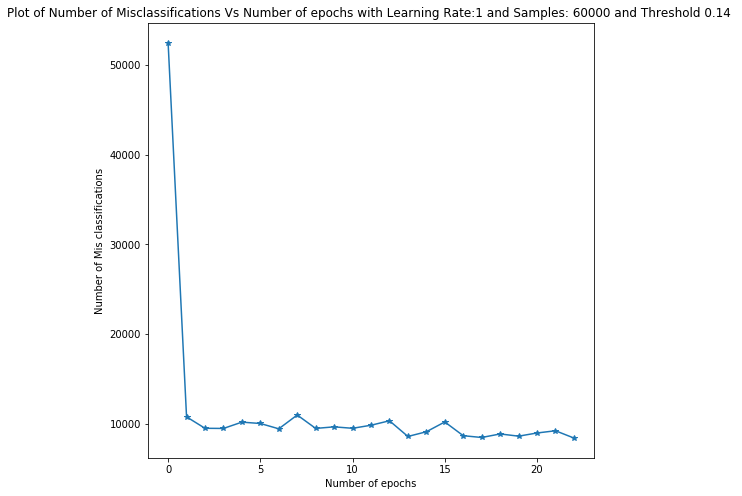

Iteration - 3
Test Data:
mis_classifications: 1462
Percentage of misclassified test samples: 14.62


In [17]:
for i in range(3):
    print('\n')
    print('*' * 50)
    print('\nIteration - {}\n'.format(i+1))
    n = 60000
    eta = 1
    threshold = 0.14

    W,errors,epochs = pta(train_images,train_labels,n,eta,threshold,get_weights())
    _ = misclassifications_plot(errors,epochs,n,eta,threshold)
    print('Iteration - {}'.format(i+1))
    print('Test Data:')
    test_mis_classifications = classify(len(test_images),W,test_images,test_labels)
    get_test_mis_classification(test_mis_classifications,test_images)

2i.<br/>
After checking the epochs for the previous iteration with 60,000 samples, we see that the threshold at 0.14 (14%) was a better choice ( The number of misclassifications was comparitively less and the algorithm also converges), so we will choose that as the threshold for the algorithm to stop the epochs. The learning rate used is same i.e *1*. and the entire training samples are used.<br/><br/>
First Time: <br/>
For the first iteration the weights were randomly chosen and the above parameters were passed and test misclassification of 16% was recorded. The network converged after running for 8 epochs.<br/><br/>
Second Time: <br/>
For the second iteration, a new set of random weights were chosen and the above parameters were passesed, and the test misclassifcation of 15% was recorded. The network converged after running for 19 epochs. <br/><br/>
Third Time: <br/>
For the third iteration, a new set of random weights were chosen and the above parameters were passesed, and the test misclassifcation of 14% was recorded. The network converged after running for 22 epochs. <br/>

As we see, all the 3 times, the number of misclassification on the test samples were close to 14%-16%, this is very similar to the case when a training sample set of 1000 was used.<br/><br/>

We may need to futher continue the epochs for training the network with 60,000 samples and reducing the threshold to see if we can achieve better results.